# Thompson Sampling

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Part 6 - Reinforcement Learning/2. Thompson sampling/Copy of Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [10]:
import random
N = 1000 # 10000 rows i.e users
d = 10 # 10 ads
ads_selected = []
numbers_of_rewards_0 = [0] * d
numbers_of_rewards_1 = [0] * d
total_reward = 0
for n in range(0,N):
  ad = 0
  max_random = 0
  for i in range(0,d):
    random_beta = random.betavariate(numbers_of_rewards_0[i]+1, numbers_of_rewards_1[i]+1)
    if random_beta > max_random :
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n,ad]
  if reward == 1:
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
  else:
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1

  total_reward = total_reward + reward

## Visualising the results - Histogram

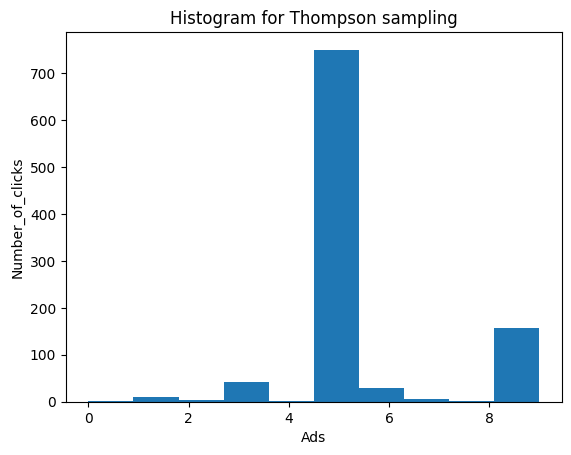

In [11]:
plt.hist(ads_selected)
plt.title('Histogram for Thompson sampling')
plt.xlabel('Ads')
plt.ylabel('Number_of_clicks')
plt.show()